# Project 1
***By: Sam Daitzman and Mary Fung***

### Question
Looking at data for the Yellowstone reintroduced wolf population, what were the chances that the Yellowstone Wolf Project would fail?

### Approach
We'll model the initial explosion in wolf population at Yellowstone using a logistic or proportional population growth model. When we have a model that matches the initial growth and slowing of growth, we'll simulate the initial introduction and population changes a large number of times. In some of these simulations, the wolf population will die off before reaching a carrying/significant population. We'll keep track of the percentage of simulations in which this happens. This will represent the percentage chance of failure according to our model.

*OPTIONAL:* We could do a parameter sweep of this simulation to figure out if Yellowstone could have achieved likely-similar outcomes with fewer introduced wolves, or increased reliability by introducing more wolves.

In [2]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions that let us model, simulate and read data
from modsim import *
from pandas import read_html, read_csv

In [80]:
# imports wolf population data
wolfData = read_csv('data/wolves.csv', index_col=0)
wolves = wolfData["YNP Wolves"]

Year
1995     21
1996     52
1997     86
1998    112
1999    118
2000    119
2001    132
2002    148
2003    174
2004    171
2005    118
2006    136
2007    171
2008    124
2009     96
2010     97
2011     98
2012     83
2013     95
2014    104
2015     98
2016    108
Name: YNP Wolves, dtype: int64

In [34]:
def plot_results(timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='Wolf population',
             title=title)

### Historical Wolf Population at Yellowstone

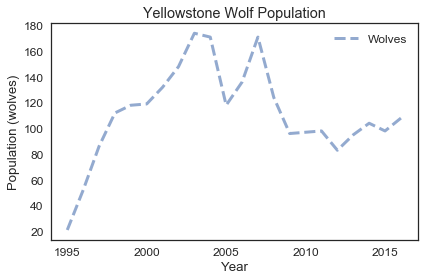

In [155]:
plot(wolves, '--', label='Wolves')
decorate(xlabel='Year',
    ylabel='Population (wolves)',
    title='Yellowstone Wolf Population')

In [100]:
t_0 = get_first_label(wolves)
t_end = get_last_label(wolves)
p_0 = get_first_value(wolves);

In [29]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

In [30]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

### Simulating the Initial Wolf Population Explosion

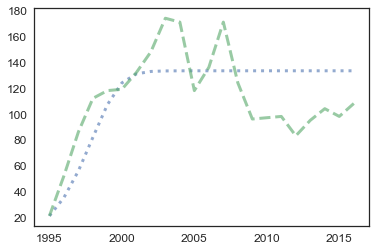

In [159]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=p_0,
                alpha=0.8,
                beta=-0.006)

results = run_simulation(system, update_func_quad)
plot(results, ':', label='Wolves')
plot(wolves, '--', label='True Population')

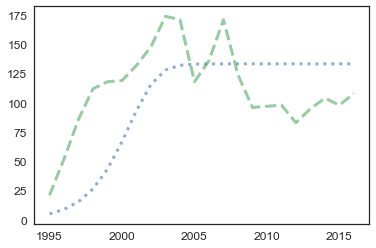

In [148]:
system2 = System(t_0=t_0, 
                t_end=t_end,
                p_0=5,
                alpha=0.8,
                beta=-0.006)

results = run_simulation(system2, update_func_quad)
plot(results, ':', label='Simulated Population')
plot(wolves, '--', label='True Population')

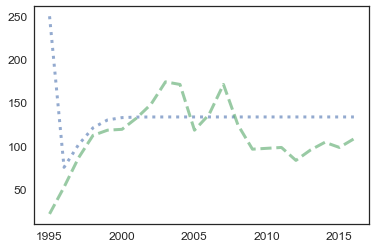

In [154]:
system = System(t_0=t_0, 
                t_end=t_end,
                p_0=250,
                alpha=0.8,
                beta=-0.006)

results = run_simulation(system, update_func_quad)
plot(results, ':', label='Simulated Population')
plot(wolves, '--', label='True Population')